In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cust=pd.read_csv("D:\Krishna\dataanalyticswithanand\Dataset\Electric vehicle launch\C8_Input_Files\dim_customers.csv")

In [14]:
cust.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [8]:
spend=pd.read_csv(r"D:\Krishna\dataanalyticswithanand\Dataset\Electric vehicle launch\C8_Input_Files\fact_spends.csv")

In [9]:
spend.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [15]:
cust.shape

(4000, 7)

In [16]:
spend.shape

(864000, 5)

In [17]:
cust.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [18]:
spend.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [20]:
cust.duplicated().sum()

0

In [21]:
spend.duplicated().sum()

0

In [22]:
cust.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income'],
      dtype='object')

In [23]:
spend.columns

Index(['customer_id', 'month', 'category', 'payment_type', 'spend'], dtype='object')

<h3>Demographic Classification</h3>

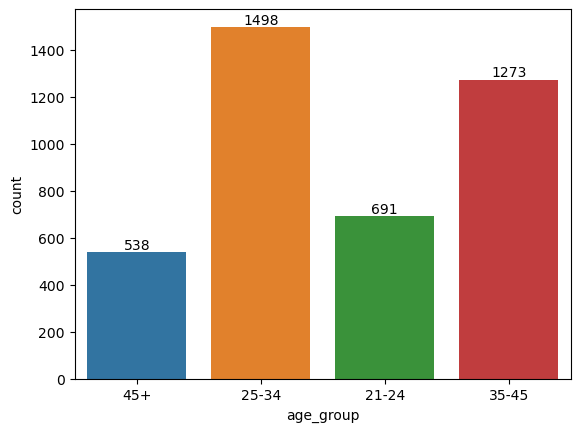

In [258]:
cust['age_group'].value_counts()
ax=sns.countplot(data=cust,x='age_group')
for bars in ax.containers:
    ax.bar_label(bars)
    

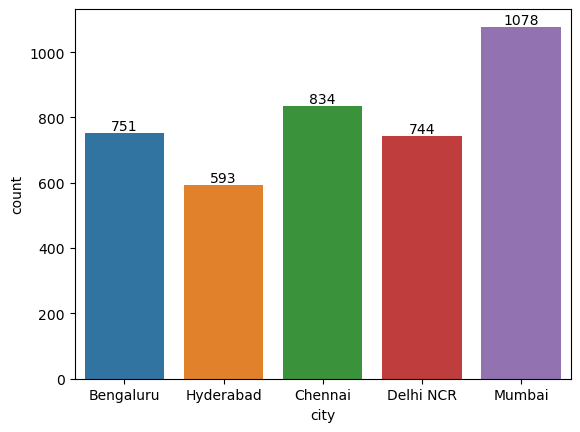

In [259]:
cust['city'].value_counts()
ax=sns.countplot(data=cust,x='city')
for bars in ax.containers:
    ax.bar_label(bars)

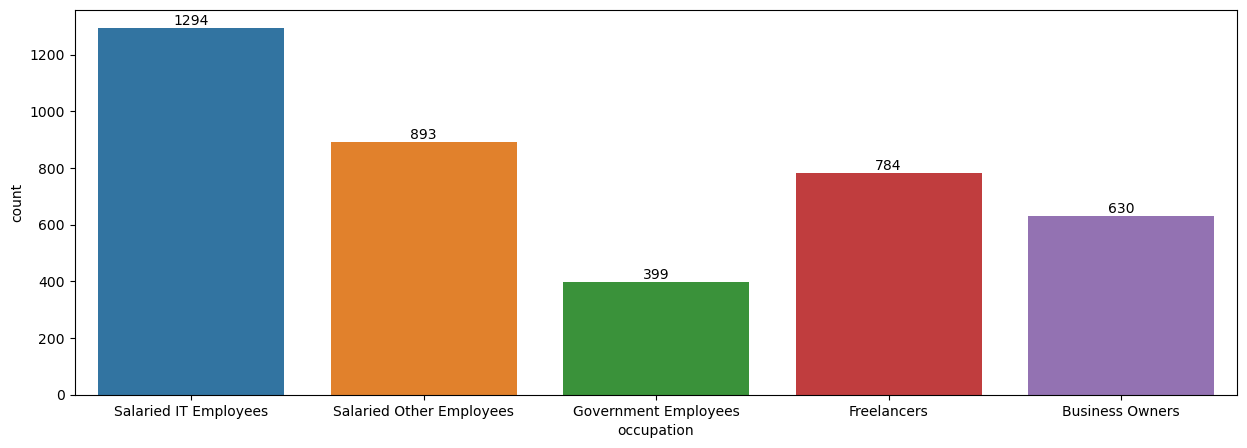

In [269]:
cust['occupation'].value_counts()
plt.figure(figsize=(15,5))
ax=sns.countplot(data=cust,x='occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
cust['gender'].value_counts()

gender
Male      2597
Female    1403
Name: count, dtype: int64

In [28]:
cust['marital status'].value_counts()

marital status
Married    3136
Single      864
Name: count, dtype: int64

In [33]:
# Average income by gender wise
cust.groupby(['gender'])['avg_income'].sum().sort_values(ascending=False)

gender
Male      134092010
Female     72536119
Name: avg_income, dtype: int64

In [296]:
# Average income by age_group
cust.groupby(['age_group'])['avg_income'].sum().sort_values(ascending=False)

age_group
25-34    77636972
35-45    68011240
45+      32843591
21-24    28136326
Name: avg_income, dtype: int64

<h3>Highest average income group is 25-34, while Lowest Average income group is 21-24</h3>

<h3>Average income of male are more than female</h3>

In [34]:
#Average income Marital status wise
cust.groupby(['marital status'])['avg_income'].sum().sort_values(ascending=False)

marital status
Married    167200590
Single      39427539
Name: avg_income, dtype: int64

<h3>Average income of married people are more than Single</h3>

In [35]:
#Average income by Occupation wise
cust.groupby(['occupation'])['avg_income'].sum().sort_values(ascending=False)

occupation
Salaried IT Employees       79580577
Business Owners             44157443
Salaried Other Employees    34642539
Freelancers                 27485671
Government Employees        20761899
Name: avg_income, dtype: int64

<h3>Average income of IT Employees are more than other occupation</h3>

In [46]:
#Average income by Occupation and gender
cust.groupby(['occupation','gender'],as_index=False)['avg_income'].sum().sort_values(by=['occupation','avg_income'],ascending=False)

,occupation,gender,avg_income
9,Salaried Other Employees,Male,21016335
8,Salaried Other Employees,Female,13626204
7,Salaried IT Employees,Male,44483320
6,Salaried IT Employees,Female,35097257
5,Government Employees,Male,12848911
4,Government Employees,Female,7912988
3,Freelancers,Male,20480838
2,Freelancers,Female,7004833
1,Business Owners,Male,35262606
0,Business Owners,Female,8894837


<h3>Average income of Male are higher compared to female employees in every occupations</h3>

In [47]:
#Average income occupation and marital status wise
cust.groupby(['occupation','marital status'],as_index=False)['avg_income'].sum().sort_values(by=['occupation','avg_income'],ascending=False)

,occupation,marital status,avg_income
8,Salaried Other Employees,Married,27907277
9,Salaried Other Employees,Single,6735262
6,Salaried IT Employees,Married,63245893
7,Salaried IT Employees,Single,16334684
4,Government Employees,Married,17111851
5,Government Employees,Single,3650048
2,Freelancers,Married,22439051
3,Freelancers,Single,5046620
0,Business Owners,Married,36496518
1,Business Owners,Single,7660925


In [52]:
#Highest Top 3 Occupation Avg income wise
cust.groupby(['occupation'],as_index=False)['avg_income'].sum().sort_values(by='avg_income',ascending=False).head(3)

,occupation,avg_income
3,Salaried IT Employees,79580577
0,Business Owners,44157443
4,Salaried Other Employees,34642539


<h3>Top 3 Occupation for average income are It Employees, Business Owners and Other employees</h3>

In [187]:
#highest average income by occupation and age_group
cust.groupby(['occupation','age_group'],as_index=False)['avg_income'].sum().sort_values(by='avg_income',ascending =False).head(3)

,occupation,age_group,avg_income
13,Salaried IT Employees,25-34,28613901
14,Salaried IT Employees,35-45,27742513
1,Business Owners,25-34,16473028


<h3>Top 3 Highest Occupation and age group for average income are It Employees of age group 25-34 and 35-45, and Business Owners of age group 25-34</h3>

In [193]:
#Lowest average income by occupation and age_group
cust.groupby(['occupation','age_group'],as_index=False)['avg_income'].sum().sort_values(by='avg_income',ascending =True).head(3)

,occupation,age_group,avg_income
8,Government Employees,21-24,2671885
4,Freelancers,21-24,3007343
11,Government Employees,45+,3022540


<h3>lowest average incomes are observed in Government Employees among 21-24. 
Younger workers in Government Employees roles face significant income challenges compared to their older,
more experienced counterparts.</h3>

In [56]:
#Join two tables
cust_spend=pd.merge(cust,spend, on='customer_id',how='inner')

In [57]:
cust_spend

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [60]:
cust_spend.columns

Index(['customer_id', 'age_group', 'city', 'occupation', 'gender',
       'marital status', 'avg_income', 'month', 'category', 'payment_type',
       'spend'],
      dtype='object')

In [63]:
#Highest 5 spending catrgory wise
cust_spend.groupby(['category','gender'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False).head(5)

,category,gender,spend
3,Bills,Male,80567679
11,Groceries,Male,66187511
5,Electronics,Male,60857815
17,Travel,Male,36576633
12,Health & Wellness,Female,36202396


In [234]:
# highest Top 5 spending category by Male
male_spending=cust_spend[cust_spend['gender'] == 'Male']
male_spending_category=male_spending.groupby(['category'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False).head(5)
male_spending_category
#ax=sns.countplot(data=male_spending_category,x='category')
#for bars in ax.containers:
 #   ax.bar_label(bars)

,category,spend
1,Bills,80567679
5,Groceries,66187511
2,Electronics,60857815
8,Travel,36576633
3,Entertainment,31475189


<h3>Males generally spend more than females, indicating higher expenditure patterns among male consumers. Consumer most spends on Bills followed by Groceries,Electronics and Travel</h3>

In [238]:
## highest Top 5 spending category by Female
female_spending=cust_spend[cust_spend['gender'] == 'Female']
female_spending_category=female_spending.groupby(['category'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False).head(5)
female_spending_category


,category,spend
6,Health & Wellness,36202396
1,Bills,24345089
8,Travel,22646691
5,Groceries,20116250
0,Apparel,18958100


<h3>
The Top 5 highest spending product categories by female are Health & Wellness, Bills, Travel, Groceries,
    and Apparel These categories collectively represent the majority of female consumer expenditure.</h3>

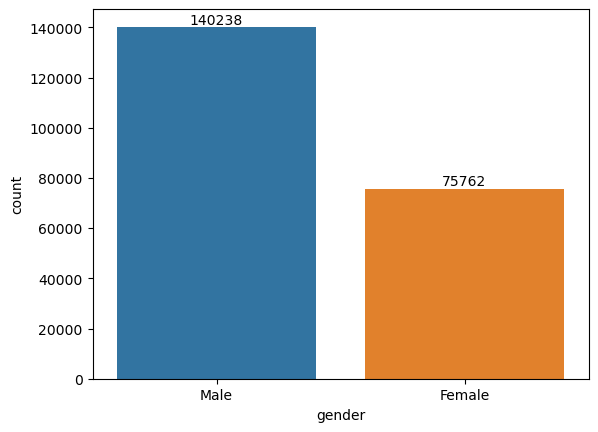

In [289]:
cust_spend_cus=cust_spend[cust_spend['payment_type']=='Credit Card']
ax=sns.countplot(data=cust_spend_cus,x='gender')
for bars in ax.containers:
    ax.bar_label(bars)


In [288]:
cust_spend_cus

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
17,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,August,Groceries,Credit Card,2143
19,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,July,Bills,Credit Card,3825
20,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Travel,Credit Card,1175
24,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,October,Groceries,Credit Card,1353
...,...,...,...,...,...,...,...,...,...,...,...
863972,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Groceries,Credit Card,1366
863973,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Credit Card,310
863979,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,July,Travel,Credit Card,1929
863985,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Others,Credit Card,249


In [78]:
#Amount spend by Male by payment type
male_spending.groupby(['payment_type'])['spend'].sum().sort_values(ascending=False)

payment_type
Credit Card    144201546
UPI             95802445
Debit Card      80453019
Net Banking     36681027
Name: spend, dtype: int64

In [79]:
#Amount spended by female using payment type
female_spending.groupby(['payment_type'])['spend'].sum().sort_values(ascending=False)

payment_type
Credit Card    72107327
UPI            45020778
Debit Card     39104210
Net Banking    17527403
Name: spend, dtype: int64

<h3> Males and Females both predominantly spend using <b>credit cards</b>, followed by UPI, debit cards and Net Banking. This indicates a preference for credit-based transactions among all consumers.</h3>

In [213]:
female_customer= cust_spend[cust_spend['gender'] == 'Female']
credit_card_female=female_customer[female_customer['payment_type'] == 'Credit Card']
credit_card_female.groupby(['city'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)


,city,spend
4,Mumbai,23450370
2,Delhi NCR,15881153
0,Bengaluru,12972003
1,Chennai,11189252
3,Hyderabad,8614549


In [300]:
credit_card_female.groupby(['occupation'])['spend'].sum().sort_values(ascending=False)

occupation
Salaried IT Employees       40995199
Salaried Other Employees    13322613
Business Owners              6382759
Freelancers                  5993466
Government Employees         5413290
Name: spend, dtype: int64

In [297]:
#Amount spended by city , credit card by male
male_customer=cust_spend[(cust_spend['gender'] == 'Male')&(cust_spend['payment_type']=='Credit Card')]
male_customer.groupby(['city'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)

,city,spend
4,Mumbai,46116280
2,Delhi NCR,29965125
0,Bengaluru,27239462
1,Chennai,21939035
3,Hyderabad,18941644


In [309]:
Avg_income=cust_spend['avg_income'].sum()
Avg_income
Avg_spend=cust_spend['spend'].sum()
Avg_spend
Avg_income_utilization=(Avg_spend/Avg_income)*100
round(Avg_income_utilization,2)

1.19

In [312]:
cust_credit=cust_spend[cust_spend['payment_type']=='Credit Card']
Avg_income=cust_credit['avg_income'].sum()
Avg_income
Avg_spend=cust_credit['spend'].sum()
Avg_spend
Avg_income_utilization=(Avg_spend/Avg_income)*100
round(Avg_income_utilization,2)

1.94

<h3>Average Utilization is very minimal only 1.19% compared to average income, and credit card users are spend 1.94% of their spending by credit card</h3>

In [298]:
male_customer.groupby(['occupation'])['spend'].sum().sort_values(ascending=False)

occupation
Salaried IT Employees       60410126
Business Owners             29631671
Salaried Other Employees    23809532
Freelancers                 20027140
Government Employees        10323077
Name: spend, dtype: int64

<h3><b>Mumbai</b> has the Highest amount spent by males and females using credit cards, while the Lowest spending trend in both the gender using credit cards can seen in <b>Hyderabad</b>. This highlights a significant trend of Higher credit card expenditures for both genders in Mumbai city and Lowest in Hyderabad</h3>

In [222]:
#Lowest amount spended by city , payment type by female
female_spending.groupby(['city','payment_type'])['spend'].sum().sort_values(ascending=False).tail()

city       payment_type
Hyderabad  Debit Card      4806583
Delhi NCR  Net Banking     3746219
Bengaluru  Net Banking     3316781
Chennai    Net Banking     2564266
Hyderabad  Net Banking     2090585
Name: spend, dtype: int64

In [293]:
#Lowest spending capacity age group in male
male_spending.groupby(['age_group'])['spend'].sum().sort_values(ascending=False).tail(1)

age_group
21-24    43951563
Name: spend, dtype: int64

In [295]:
#Highst spending capacity age group in male
male_spending.groupby(['age_group'])['spend'].sum().sort_values(ascending=False).head(1)

age_group
25-34    136290216
Name: spend, dtype: int64

In [104]:
#Lowest spending capacity age group in female
female_spending.groupby(['age_group'])['spend'].sum().sort_values(ascending=False).tail(1)

age_group
45+    20360196
Name: spend, dtype: int64

In [105]:
#Highst spending capacity age group in female
female_spending.groupby(['age_group'])['spend'].sum().sort_values(ascending=False).head(1)

age_group
25-34    67066968
Name: spend, dtype: int64

<h3>Both genders in the 25-34 age group have the highest earning capacity, while the lowest earning capacity varies, with males aged 21-24 and females aged 45 and above. Same trend can be seen in average income also</h3>

In [106]:
cust_spend

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334
...,...,...,...,...,...,...,...,...,...,...,...
863995,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,May,Bills,Net Banking,548
863996,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,October,Apparel,UPI,174
863997,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,September,Food,Debit Card,346
863998,ATQCUS3477,25-34,Mumbai,Business Owners,Male,Single,73541,June,Apparel,Net Banking,54


In [111]:
#Highest spending month for All customers
cust_spend.groupby(['month'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)

,month,spend
5,September,115929577
0,August,100859350
4,October,86026137
1,July,80624751
2,June,79318104
3,May,68139836


In [112]:
#spending capacity by month for female
female_spending.groupby(['month'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)

,month,spend
5,September,37824060
0,August,33013569
4,October,28258227
1,July,26406215
2,June,25859631
3,May,22398016


In [113]:
#Highest spending month for male
male_spending.groupby(['month'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)

,month,spend
5,September,78105517
0,August,67845781
4,October,57767910
1,July,54218536
2,June,53458473
3,May,45741820


<h3>Both genders exhibit <b>peak</b> spending in <b>September</b>, reflecting increased expenditures during this month. 
</h3>

In [290]:
#Top 1 highest spending capacity age_group by month and gender 
cust_spend_month=cust_spend.groupby(['month','age_group','gender','occupation','category'],as_index=False)['spend'].sum().sort_values(by=['month','spend'],ascending=False)
#cust_spend_month.groupby(['month']).head(1)
cust_spend_month.head(1)

,month,age_group,gender,occupation,category,spend
2053,September,35-45,Male,Salaried IT Employees,Bills,3023912


In [254]:
#Lowest spending done by age_group,month,occupation and gender 
cust_spend_month=cust_spend.groupby(['month','age_group','gender','occupation','category'],as_index=False)['spend'].sum().sort_values(by='spend',ascending=False)
cust_spend_month.tail(1)


,month,age_group,gender,occupation,spend
122,May,21-24,Female,Government Employees,176413


In [291]:
cust_spend.groupby(['age_group'])['spend'].sum().sort_values(ascending=False)

age_group
25-34    203357184
35-45    190639828
21-24     68523077
45+       68377666
Name: spend, dtype: int64

<h3><b>Highest</b> amount spend in month of <b>september</b> by Salaried <b>IT male </b>employee of age group<b> 35-45</b>, whereas <b>Lowest</b> amount spend in month of <b>may</b> by <b>female Government Employees</b> of age group <b>21-24</b> </h3>

<h3><b>Conclusion</b></h3>
<h3><b>Highest</b> credit card customers are in <b>Male</b> category from  <b>Mumbai</b>, working in <b>IT</b> from age group <b>35-45</b>, and they spend highest in month of <b>september</b> for <b>BILLs</b>. </h3>